# Analysis of Numila Performance

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [3]:
cd ~/Umila/numila

/Users/fred/Umila/numila


In [17]:
from collections import Counter, OrderedDict
import pandas as pd
import numpy as np
import main
import utils
from numila import Numila

In [25]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('muted')

In [5]:
# Hide logging messages.
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

# Production accuracy

Numila slightly outperforms a trigram and bigram model on the BLEU utterance ordering task. The advantage disappears when `EXEMPLAR_THRESHOLD` is set to 1 (preventing any chunks from being stored in the graph).

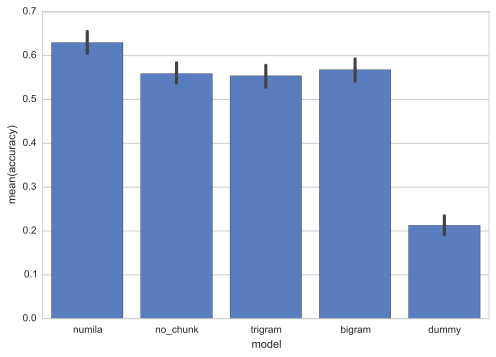

In [31]:
# The code for this simulation is not displayed here. We load previous results.
production = pd.read_pickle('pickles/production.pkl').query('model != "infant"')
production.head()
sns.barplot(x='model', y='accuracy', data=production,
            color=sns.color_palette()[0],
            order=['numila', 'no_chunk', 'trigram', 'bigram', 'dummy'])
sns.plt.savefig('figs/production.pdf')

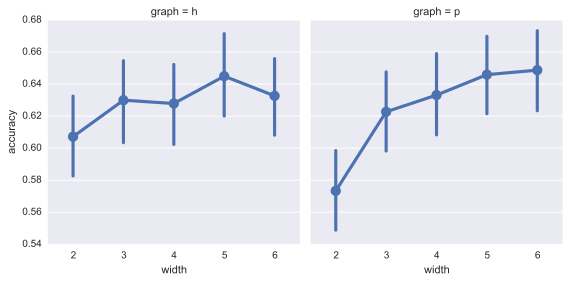

In [14]:
df = pd.read_pickle('pickles/opt-production.pkl')
new_cols = zip(*df.model)
df['graph'], df['width'] = new_cols
sns.factorplot(x='width', col='graph', y='accuracy',order=[2,3,4,5,6], data=df)

# Grammaticality judgement

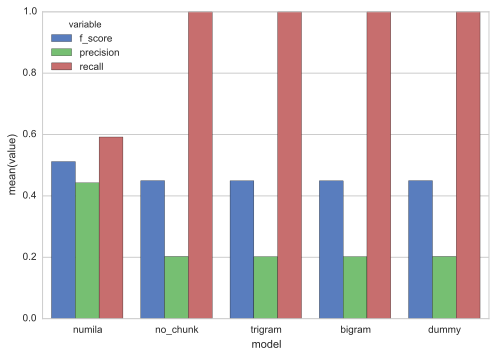

In [33]:
bleu = pd.read_pickle('pickles/grammaticality.pkl')
bleu = pd.melt(bleu, id_vars=['model'])
sns.barplot(x='model', y='value', hue='variable',
               order=['numila', 'no_chunk', 'trigram', 'bigram', 'dummy'], data=bleu)
sns.plt.savefig('figs/grammaticality.pdf')

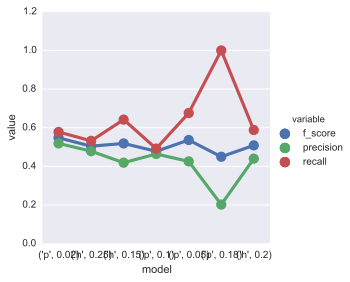

In [82]:
import seaborn as sns
import pandas as pd
bleu = pd.read_pickle('pickles/opt-grammaticality.pkl')
bleu = pd.melt(bleu, id_vars=['model'])
sns.factorplot(x='model', y='value', hue='variable', data=bleu)

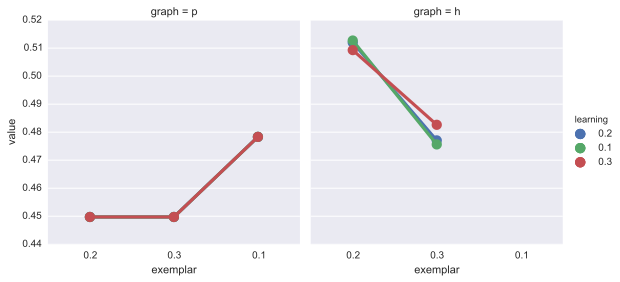

In [65]:
bleu = bleu.query('model not in @exclude and variable == "f_score"')

def parse_name(name):
    g, e, l = name.split('-')
    return g, float(e), float(l)

exclude = ("bigram", "trigram")
new_cols = zip(*map(parse_name, bleu.model))
bleu['graph'], bleu['exemplar'], bleu['learning'] = new_cols
sns.factorplot(x='exemplar', hue='learning', col='graph', y='value', data=bleu)